# Analiza podataka projekata i operatera za dan 3-3-2020

## Sažetak  

- Cilj analize je da iz dostavljenih podataka možemo da kvantifikujemo rad operatera, pratimo ih, kao i projekte, alate i taskove na kojima rade.
- Glavni alati koji su se koristili prilikom obrade podataka su Paython, Regular expressions, SQL

## Početno prolaženje kroz dobijeni dataset

-  Dobijeni podatci su u formi JSON i simbolično su prikazani na slici ispod 
![alt text](Slike/Json_1.PNG)
<i><center>Slika 1. Iznad prikazano uzorak dobijenih podataka</center> </i>
- Informacije direktno o radniku: vreme rada na tasku i task kojim se bavi, tasks__email
- Informacije direktno o projektu: 'operator', 'spins', 'rooms', floors', 'furniture', 'projectName','status', 'livableArea', 'area', 'photoCaptures', 'videoCapture'

### Limitacije dataseta

- Glavna limitacija podataka je što nema puno podatke za operatere (Koliko je vremena rađen task i koji je task rađen su jedine informacije vezane direktno njih) ali se neke informacije mogu indirektno zaključiti preko projekta
- Takođe kako se dešava da više operatora radi na istom tasku,limitacija je što nema koliko je prvi operater uradio dok nije drugi operater preuzeo taj posao (da bi se bolje kvantifikovao rad)
- Još jedna mana je zbog veličine dataseta, statistike za dužine završenih projekata neće biti precizna kako mnogi projekti prelaze iz prethodnog dana 
![alt text](Slike/Json_.PNG)
<i><center>Slika 2. Iznad prikazano kako je projekat gotov a u tom danu se radio samo QA, ovaj problem je lako rešiv sa celokupnim skupom podataka</center> </i>

### Dodatnie informacije
- JSON je jako sličan dictionery-u ali sam se ja opredelio za rad sa tabularnim podatcima kako mnogo efikasnije mogu da koristim te alate


In [515]:
import numpy as np 
import pandas as pd 
import json 
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams

#plotting settings
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

In [518]:
#Pre rada:
#Sa RegEx (u PyCharmu) prebacio sam 'ISO time' u format 'datetime' koji python prepoznaje 
#Prebacio json u excel

df = pd.read_excel('Data/0. DF_JSON.xlsx')#load dataset (prebaceni json u excel)
df.head()

,_id,tasks__operator,tasks__task__type,tasks__task__name,tasks__started,tasks__finished,tasks__email,spins,rooms,floors,...,projectName,orgId,status,livableArea,area,photoCaptures,videoCapture,tasks__task__mandatory,tasks__task__optional,tasks__task__undefined
0,jYvKmEqWDL,oce0ogRYlB,qa,QA,17:16:00,19:02:00,israk.civil@gmail.com,112.0,30.0,2.0,...,90748140,6lEeqxPoh6,finished,5.390015e+06,5.731908e+06,0.0,0.0,NaN,NaN,NaN
1,NaN,oce0ogRYlB,qa,QA,19:40:00,20:42:00,israk.civil@gmail.com,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OQhgIhyhlu,FcyNpCCzIV,assessment,Assessment,00:09:00,00:11:00,nantoroy.vcube@gmail.com,25.0,13.0,1.0,...,50110807 - 8425 Mission Hills Road - Rent Ready,9VN3tg87UF,operator_assigned,1.623662e+06,1.623662e+06,11.0,0.0,NaN,NaN,NaN
3,NaN,nlKGPsVh8E,floor_f1Ce8foK9H,Ground Floor,00:12:00,01:24:00,samiul.vcube@gmail.com,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,L8pNYn8iDx,rTHP2F3fHt,floor_fxLFcpECDh,Ground Floor,00:18:00,01:15:00,hasan.vcube@gmail.com,22.0,14.0,1.0,...,10700290 - 9822 Vandenberg Way San Antonio Tex...,kZe5Ded0pa,ready_for_operator_qa,1.346923e+06,1.725780e+06,13.0,0.0,1.0,NaN,NaN


In [519]:
#POPUNJAVANJE 'None' sa najbiližom vrednošću iznad (u kolonama gde to ima logike)
collums_fill_nan = ['_id','spins', 'rooms', 'floors' , 'furniture', 'status', 
                    'photoCaptures', 'videoCapture', 'livableArea', 'area' ]
for collum in collums_fill_nan:
    df[collum].fillna(method='ffill', inplace = True) 

#PRAVLJENJE KOLONE 'work_time' (for each task in project)
work_time = []
for index in range(len(df)):
    time_delta = datetime.combine(date.today(), df['tasks__finished'].iloc[index])- datetime.combine(date.today(), df['tasks__started'].iloc[index])
    work_time.append(time_delta.seconds )
df['work_time'] = work_time
df.to_csv('Data/Dataset_sql.csv') #ovo služi kao GLAVNI CSV koji koristim dalje u SQL queries
df.head()

,_id,tasks__operator,tasks__task__type,tasks__task__name,tasks__started,tasks__finished,tasks__email,spins,rooms,floors,...,orgId,status,livableArea,area,photoCaptures,videoCapture,tasks__task__mandatory,tasks__task__optional,tasks__task__undefined,work_time
0,jYvKmEqWDL,oce0ogRYlB,qa,QA,17:16:00,19:02:00,israk.civil@gmail.com,112.0,30.0,2.0,...,6lEeqxPoh6,finished,5.390015e+06,5.731908e+06,0.0,0.0,NaN,NaN,NaN,6360
1,jYvKmEqWDL,oce0ogRYlB,qa,QA,19:40:00,20:42:00,israk.civil@gmail.com,112.0,30.0,2.0,...,NaN,finished,5.390015e+06,5.731908e+06,0.0,0.0,NaN,NaN,NaN,3720
2,OQhgIhyhlu,FcyNpCCzIV,assessment,Assessment,00:09:00,00:11:00,nantoroy.vcube@gmail.com,25.0,13.0,1.0,...,9VN3tg87UF,operator_assigned,1.623662e+06,1.623662e+06,11.0,0.0,NaN,NaN,NaN,120
3,OQhgIhyhlu,nlKGPsVh8E,floor_f1Ce8foK9H,Ground Floor,00:12:00,01:24:00,samiul.vcube@gmail.com,25.0,13.0,1.0,...,NaN,operator_assigned,1.623662e+06,1.623662e+06,11.0,0.0,1.0,NaN,NaN,4320
4,L8pNYn8iDx,rTHP2F3fHt,floor_fxLFcpECDh,Ground Floor,00:18:00,01:15:00,hasan.vcube@gmail.com,22.0,14.0,1.0,...,kZe5Ded0pa,ready_for_operator_qa,1.346923e+06,1.725780e+06,13.0,0.0,1.0,NaN,NaN,3420


## 1. GENERALNE STATISTIKE

In [522]:
broj_projekata = len(df['_id'].unique())
print(f'Broj projekata: {broj_projekata}')
broj_gotovih_projekata = len(df[df['status']== 'finished']['_id'].unique())
print(f'Broj gotovih projekata: {broj_gotovih_projekata}')
broj_operatora = len(df['tasks__operator'].unique())
print(f'Broj operatora: {broj_operatora}')

avrage_work_time_on_task = df[df['work_time'] > 300]['work_time'].mean() #izbacujem one koji su radili manje od 5min
mediana = df[df['work_time'] > 300]['work_time'].median()
print('Srednje vreme rada  operatora na zadatku: {:.2f} min'.format(avrage_work_time_on_task/60))
print('Njacesce vreme rada (50th percentile) operatora na zadatku: {:.2f} min'.format(mediana/60))

avrage_project_area = df[df['area'] > 500]['area'].mean() 
print('Srednje dimenzija objekta: {:.2f}'.format(avrage_project_area))
avrage_project_rooms = df[df['rooms'] > 0]['rooms'].mean() 
print('Srednje broj soba: {:.2f}'.format(avrage_project_rooms))
print('\n')

Broj projekata: 170
Broj gotovih projekata: 127
Broj operatora: 122
Srednje vreme rada  operatora na zadatku: 70.26 min
Njacesce vreme rada (50th percentile) operatora na zadatku: 44.00 min
Srednje dimenzija objekta: 2984318.80
Srednje broj soba: 17.43




# 2. Statistike projekta

### 2.1. Sati aktivnog rada po projektu (za taj dan)

![alt text](Slike/sql_2.PNG)
<i><center>Slika SQL code za vreme provedeno po projektu danas</center> </i>

In [456]:
df_proj_ = pd.read_csv('Data/1. Sati aktivnog rada po projektu.csv')
df_proj_.sort_values('Sati_aktivnog_rada', ascending = False, inplace=True)
df_proj_.head()

,_id,Sati_aktivnog_rada
169,dDgiOkAFrM,22.083333
168,E7SrxqsbIX,21.266667
167,DHXMANe4YC,19.266667
166,8C6Z4ZOziK,18.433333
165,kL2NhZZs10,17.766667


In [457]:
srednje_vreme = df_proj_[df_proj_['Sati_aktivnog_rada'] > 1].mean() 
print('Srednje vreme aktivnog rada na projektu (ne uključuju se pauze): {:.2f}h'.format(float(srednje_vreme)))

Srednje vreme aktivnog rada na projektu (ne uključuju se pauze): 5.70h


Quantiles:
0.05     1.241667
0.25     2.758333
0.50     4.683333
0.75     7.158333
0.95    14.991667
Name: Sati_aktivnog_rada, dtype: float64


Text(0.5, 1.0, 'Box plot')

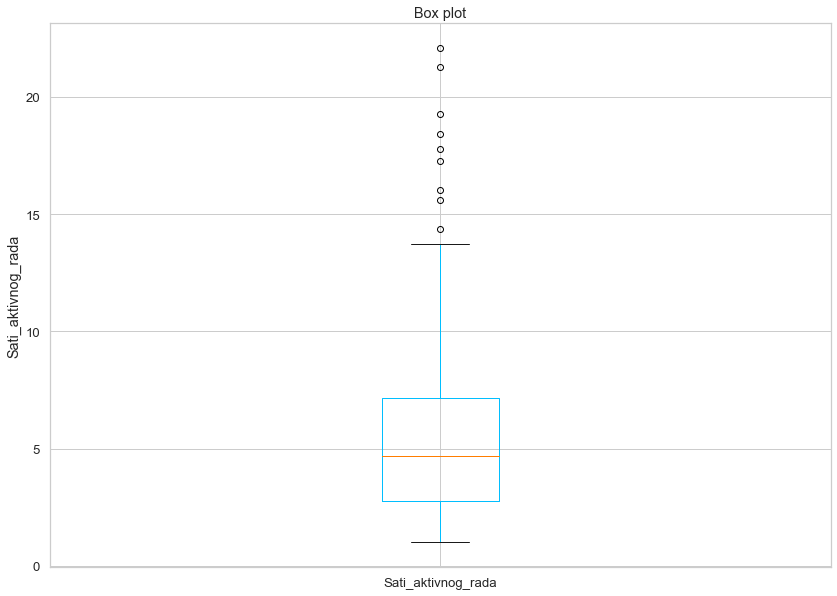

In [525]:
print('Quantiles:')
print(df_proj_[df_proj_['Sati_aktivnog_rada'] > 1]['Sati_aktivnog_rada'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
ax = (df_proj_[df_proj_['Sati_aktivnog_rada'] > 1]['Sati_aktivnog_rada']).plot.box()
ax.set_ylabel('Sati_aktivnog_rada')
ax.set_xlabel('')
ax.set_title('Box plot')

Komentar: Ovi plotovi su generalno korisni da se vidi distribucija podataka. Iz Box plota iznad se lako vidi da je medijana, odnosno najčešće trajanje projekta 4.68h a da su 75th and 25th percentiles gornja i donja granica u ovom slučaju između 2.7h i 7.1h

### 2.2. Vreme potrebno za završen projekat (skalirano po veličini prostora) 
- Kako veličina objekta utiče na vreme izrade, da bi bilo objektivnije, izdvojeno je vreme rada po jedinici prostora (jedinica prostora koja je data u datasetu)
- Ovo je subjektivna metrika koja mi je imala smisla i kasnije sam je koristio na ostalim problemima
![alt text](Slike/sql_3.PNG)
<i><center>Slika SQL code Vreme potrebno za završen projekat (skalirano po veličini prostora)</center> </i>

In [458]:
#metrika ima limitacija na ovom data setu, ali na pravom ne bi trebalo
print(f'najproduktivniji projekti: {produktivan}')
df_proj = pd.read_csv('Data/1.Vreme po projektu po prostru.csv')
df_proj.sort_values('Vreme_rada_po_velicini_projekta', ascending = False, inplace=True)
df_proj.head()

najproduktivniji projekti: 0    ssxsD9sz3W
Name: _id, dtype: object


,_id,Vreme_rada_po_velicini_projekta
122,Xekqt4Riib,0.052492
121,3axCOOrlSE,0.040841
120,ibAALs4Kib,0.032630
119,9sKFu8BKHj,0.032498
118,DHXMANe4YC,0.032137


In [523]:
produktivan = df_proj[df_proj['Vreme_rada_po_velicini_projekta'] == df_proj['Vreme_rada_po_velicini_projekta'].min()]['_id']
produktivan_ = df_proj[df_proj['Vreme_rada_po_velicini_projekta'] == df_proj['Vreme_rada_po_velicini_projekta'].max()]['_id']
print(f'NAJPRODUKTIVNIJI PROJEKTI: {produktivan}')
print(f'NAJMANJE PRODUKTIVNI PROJEKTI: {produktivan_}')

NAJPRODUKTIVNIJI PROJEKTI: 0    ssxsD9sz3W
Name: _id, dtype: object
NAJMANJE PRODUKTIVNI PROJEKTI: 122    Xekqt4Riib
Name: _id, dtype: object


# 3. Analiza operatora 

## 3.1. Srednje vreme rada po operatoru

![alt text](Slike/sql_1.PNG)
<i><center>SQL code</center> </i>

In [403]:
df_operatori = pd.read_csv('Data/Kolko su radili ljudi.csv')
df_operatori.sort_values('Sati_rada', ascending = False, inplace=True)
df_operatori.head()

,tasks__operator,Sati_rada
121,1pofW9PHH6,11.350000
120,CY1etv187c,10.983333
119,XH9hDFiMfC,10.616667
118,FsQyGX2H4m,10.583333
117,NH414EguSY,10.566667


In [336]:
print('Operatori sa najviše sati rada danas:\n ')
print(df_operatori[0:5])
print('\n')
print('Operatori sa najmanje sati rada danas:\n ')
print(df_operatori[df_operatori['Sati_rada']>0.5].sort_values('Sati_rada')[:5])


Operatori sa najviše sati rada danas:
 
    tasks__operator  Sati_rada
121      1pofW9PHH6  11.350000
120      CY1etv187c  10.983333
119      XH9hDFiMfC  10.616667
118      FsQyGX2H4m  10.583333
117      NH414EguSY  10.566667


Operatori sa najmanje sati rada danas:
 
   tasks__operator  Sati_rada
6       462bsh78PH   1.283333
7       c2IiL901cb   1.316667
8       sjPT3lh2KD   1.633333
9       bKKy3cqEhu   1.716667
10      SCuob85her   1.850000


Quantiles:
0.05     2.683333
0.25     6.562500
0.50     7.475000
0.75     8.950000
0.95    10.491667
Name: Sati_rada, dtype: float64


Text(0.5, 1.0, 'Box plot')

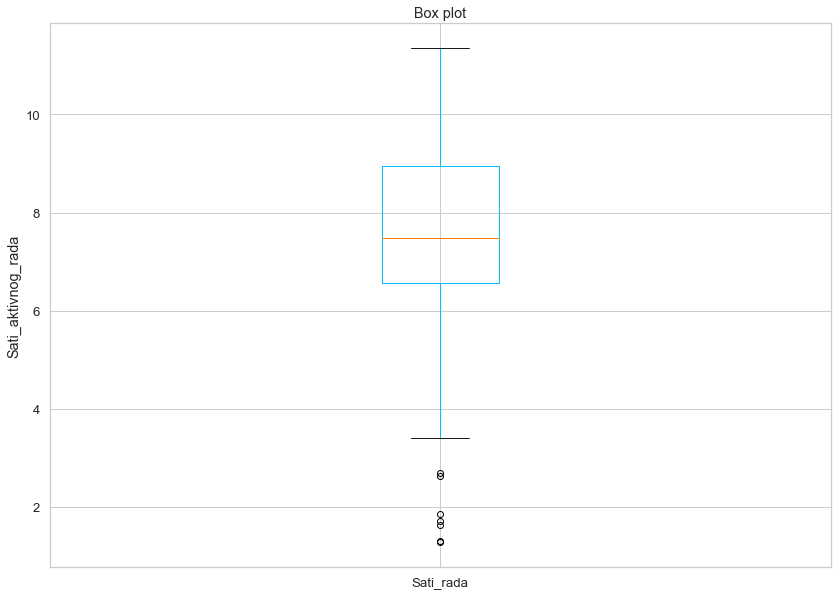

In [524]:
#Scatter plot
print('Quantiles:')
print(df_operatori[df_operatori['Sati_rada'] > 0.5]['Sati_rada'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
ax = (df_operatori[df_operatori['Sati_rada'] > 0.5]['Sati_rada']).plot.box()
ax.set_ylabel('Sati_aktivnog_rada')
ax.set_xlabel('')
ax.set_title('Box plot')

Komentar: Iz Box plota iznad se lako vidi da je medijana, odnosno najčešće rad operatera 7.5h (što je očekivano), a da su 75th and 25th percentiles gornja i donja granica u ovom slučaju između 6.5h i 9h, treba kontaktirati donjih 25% percentile

C:\Users\Freedom\Anaconda3\envs\master_rad\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:title={'center':'Cluster po satima rada operateri'}, xlabel='index_operatera', ylabel='Sati_rada'>

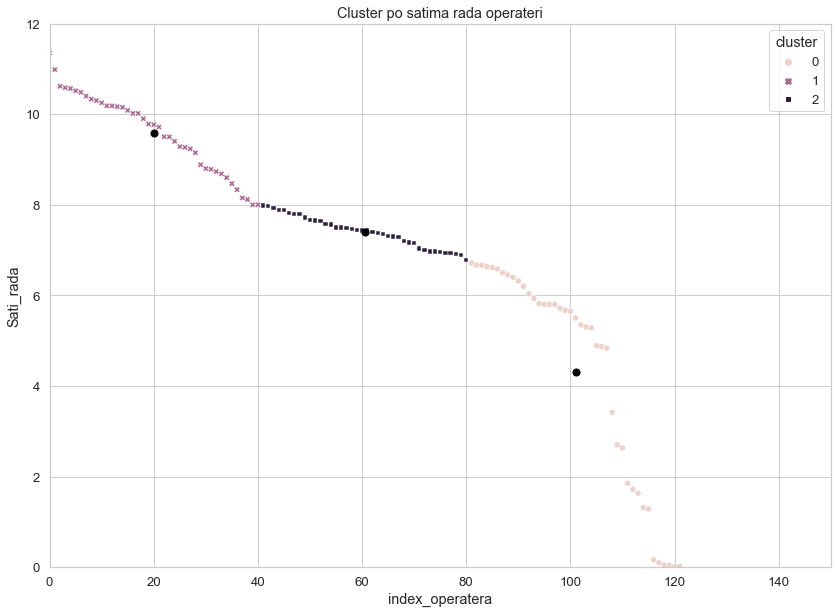

In [409]:
from sklearn.cluster import KMeans
#simbolicki prikazan K means clastering na kome klasterujemo najproduktivnije radnike 

df_operatori['index_operatera'] = range(len(df_operatori))

df = df_operatori[['index_operatera', 'Sati_rada']] 
kmeans = KMeans(n_clusters=3).fit(df)
df['cluster'] = kmeans.labels_ #claster labels
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['index_operatera', 'Sati_rada']) 

fig, ax = plt.subplots()
ax = sns.scatterplot(x='index_operatera', y='Sati_rada', hue='cluster', style='cluster',
ax=ax, data=df)
ax.set_xlim(0, 150)
ax.set_ylim(0, 12)
ax.set_title('Cluster po satima rada operateri')
centers.plot.scatter(x='index_operatera', y='Sati_rada', ax=ax, s=50, color='black')



## 3.2. Odabir najproduktivnijih operatora po tasku

- Metrika:
    - Projekti na kojima radi najbrže se završe
    - Njegova uloga u tom tasku projekta je veća od 30% (Vremena) 
    - Projekat mora da bude završen 
    - Urađeno odvojeno za QA taskove i za ostale taskove


### 3.2.1. Projekti sa operatorom na QA tasku  
![alt text](Slike/sql_4.PNG)
<i><center>SQL code</center> </i>
- ds : Dataset_sql.csv (glavni CSV)
- vpp : Vreme po projektu po prostru.csv (Vreme potrebno za završen projekat (skalirano po veličini prostora)

In [212]:
df_operatori_qa = pd.read_csv('Data/2.QA_30%.csv')
df_operatori_qa.sort_values('srednje_vreme_na_projektima_u_kojima_je_ucestvovao', ascending = False, inplace=True)
df_operatori_qa.head()
#srednje_vreme_na_projektima_u_kojima_je_ucestvovao je skalirano u zavisnosti od veličine objekta
#(po jedinici prostora) 

,Operater,srednje_vreme_na_projektima_u_kojima_je_ucestvovao
24,bKVcU0Dg6J,0.018469
27,d3g8920pzD,0.017667
4,9KQW28GALF,0.016057
33,mQJzmFcAP7,0.015950
17,SCyIhRheFc,0.015049


In [213]:
print('QA Operatori ciji su projekti najneproduktivniji:\n ')
print(df_operatori_qa[0:3]['Operater'])
print('\n')
print('QA Operatori ciji su projekti najproduktivniji:\n ')
print(df_operatori_qa.sort_values('srednje_vreme_na_projektima_u_kojima_je_ucestvovao')[0:3]['Operater'])

QA Operatori ciji su projekti najneproduktivniji:
 
24    bKVcU0Dg6J
27    d3g8920pzD
4     9KQW28GALF
Name: Operater, dtype: object


QA Operatori ciji su projekti najproduktivniji:
 
23    bKKy3cqEhu
2     3ql1T6Bhar
8     FcyNpCCzIV
Name: Operater, dtype: object


### 3.2.2. Operateri na 'ne QA' (primer: floor plan ..) taskovima 

![alt text](Slike/sql_5.PNG)
<i><center>SQL code</center> </i>
- ds : Dataset_sql.csv (glavni CSV)
- vpp : Vreme po projektu po prostru.csv (Vreme potrebno za završen projekat (skalirano po veličini prostora)

In [218]:
df_operatori_ne_qa = pd.read_csv('Data/2.neQA_30%.csv')
df_operatori_ne_qa.sort_values('srednje_vreme_na_projektima_u_kojima_je_ucestvovao', ascending = False, inplace=True)
df_operatori_ne_qa.head()
#srednje_vreme_na_projektima_u_kojima_je_ucestvovao je skalirano u zavisnosti od veličine objekta
#(po jedinici prostora) 

,Operater,srednje_vreme_na_projektima_u_kojima_je_ucestvovao
4,5D8ktsKwkm,0.040841
61,miNAe91tcO,0.032564
43,c9eEm6WwGx,0.027926
36,WxFQdxxRg8,0.022535
55,jU4oFWoVtv,0.020043


In [219]:
print('Operatori (ne QA) ciji su projekti najneproduktivniji:\n ')
print(df_operatori_ne_qa[0:3]['Operater'])
print('\n')
print('Operatori(ne QA) ciji su projekti najproduktivniji:\n ')
print(df_operatori_ne_qa.sort_values('srednje_vreme_na_projektima_u_kojima_je_ucestvovao')[0:3]['Operater'])

Operatori (ne QA) ciji su projekti najneproduktivniji:
 
4     5D8ktsKwkm
61    miNAe91tcO
43    c9eEm6WwGx
Name: Operater, dtype: object


Operatori(ne QA) ciji su projekti najproduktivniji:
 
57    loO0gOUSOP
11    APnaTJhhYt
48    g3WKpayJfI
Name: Operater, dtype: object


# 4. Analiza po taskovima

## 4.1. FLOOR PLAN

![alt text](Slike/sql_6.PNG)
<i><center>SQL code</center> </i>

In [410]:
# Odatle dobijen Floar plan
df_floarplan = pd.read_csv('Data/3. Floor plan .csv')
df_floarplan.sort_values('Task_Name', ascending = False, inplace=True)
df_floarplan.head()
#work_time_by_project_size je slično kao ranije izraženo kao: Work_time_po_zadatku/(Povrsina_prostora/broj spratova)
#Kako veličina objekta utiče na vreme izrade floor plana, da bi bilo objektivnije, izdvojeno je vreme rada po jedinici prostora (jedinica prostora koja je data u datasetu)
#to je urađeno kako bi mogli da se porede adekvatno, možemo da diskusujemo o ovme

,project id,Task_Name,work_time_by_project_size,broj operatera
51,DHXMANe4YC,Third Floor,0.006172,2
32,bvdd8e6v4G,Second Floor,0.003750,1
27,df3blK7xCK,Second Floor,0.003333,1
48,kbG28DWnEl,Second Floor,0.005219,1
21,hS1Alp29rA,Second Floor,0.002700,2


- work_time_by_project_size je slično kao ranije izraženo kao: Work_time_po_zadatku/(Povrsina_prostora/broj spratova)
- Kako veličina objekta utiče na vreme izrade floor plana, da bi bilo objektivnije, izdvojeno je vreme rada po jedinici prostora (jedinica prostora koja je data u datasetu)
- Možemo da se i promeni otvoreno je za diskusiju

In [411]:
print('Srednje vreme rada za floor plan po spratu:{}'.format(df_floarplan['work_time_by_project_size'].mean()))
print('Srednje vreme rada kada radi jedan operator :', df_floarplan[df_floarplan['broj operatera'] == 1].mean()['work_time_by_project_size'])
print('Srednje vreme rada kada radi dva operator :', df_floarplan[df_floarplan['broj operatera'] == 2].mean()['work_time_by_project_size'])
print('Srednje vreme rada kada radi vise od dva operatora :', df_floarplan[df_floarplan['broj operatera'] > 2].mean()['work_time_by_project_size'])

Srednje vreme rada za floor plan po spratu:0.004150204102800419
Srednje vreme rada kada radi jedan operator : 0.0037417595060630264
Srednje vreme rada kada radi dva operator : 0.004432104953289013
Srednje vreme rada kada radi vise od dva operatora : 0.006842433832525965


### Zaključak 
Za svakog dodatnog operatora na floor planu vreme trajanje izrade po jedinici prostora raste priblizno 60%

Text(0.5, 1.0, 'Kako se povećava vreme rada sa povećanjem broja ljudi na projektu')

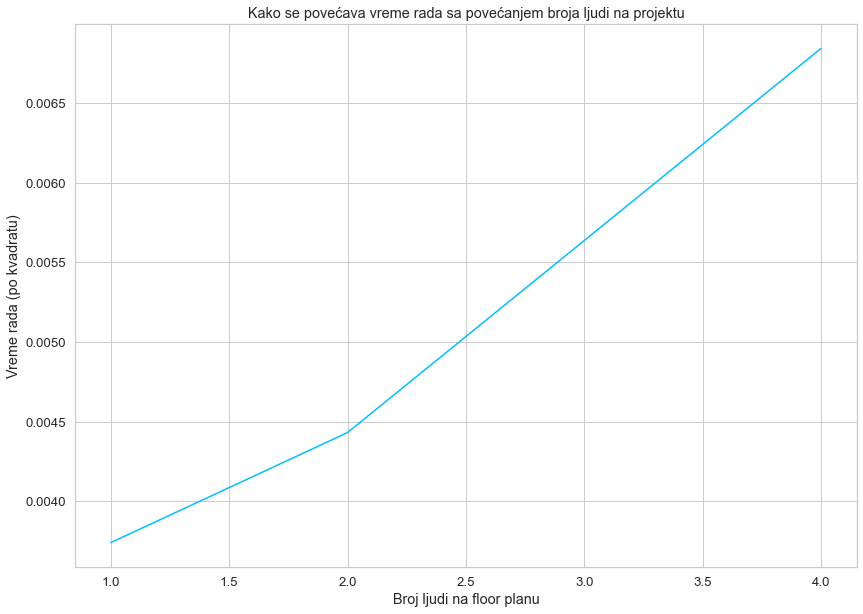

In [412]:
# kako se povećava vreme rada sa povećanjem broja ljudi na projektu
plt.plot([1,2,4], [df_floarplan[df_floarplan['broj operatera'] == 1].mean()['work_time_by_project_size'],
          df_floarplan[df_floarplan['broj operatera'] == 2].mean()['work_time_by_project_size'],
         df_floarplan[df_floarplan['broj operatera'] > 2].mean()['work_time_by_project_size']])
plt.xlabel("Broj ljudi na floor planu")
plt.ylabel("Vreme rada (po kvadratu)")
plt.title('Kako se povećava vreme rada sa povećanjem broja ljudi na projektu')

Text(0.5, 1.0, 'Raspodela broja ljudi po floor planu')

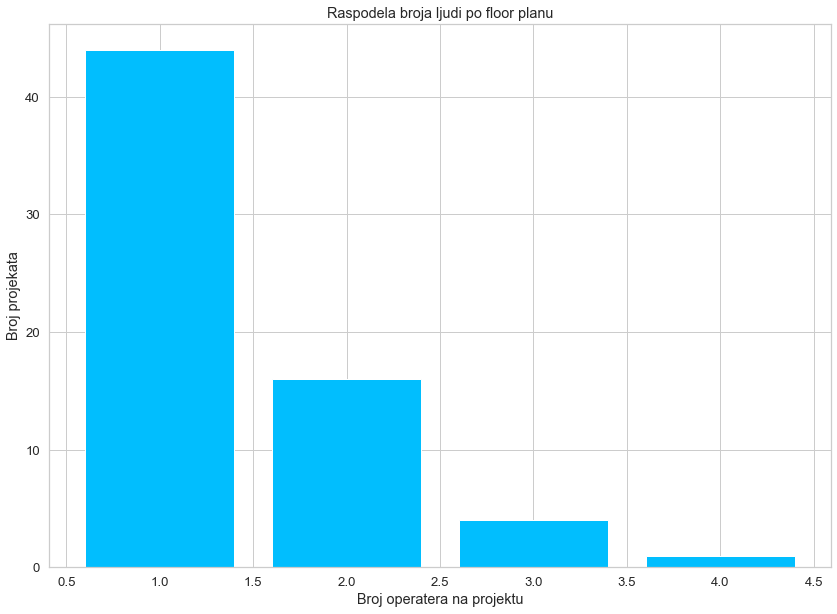

In [413]:
#scatter plot
_1 = len(df_floarplan[df_floarplan['broj operatera']== 1])
_2 = len(df_floarplan[df_floarplan['broj operatera']== 2])
_3 = len(df_floarplan[df_floarplan['broj operatera']== 3])
_4 = len(df_floarplan[df_floarplan['broj operatera']== 4])

#plt.scatter(range(len(df_floarplan['broj operatera'])), df_floarplan['broj operatera'], s=50)
plt.bar([1,2,3,4],[_1,_2,_3,_4])
plt.xlabel("Broj operatera na projektu")
plt.ylabel("Broj projekata")
plt.title('Raspodela broja ljudi po floor planu')

In [414]:
print('Od {} projekata, {} projekta imaju 3 ili više različitih operatera ZA ISTI Floor plan.\nKako smo videli da vreme projekta raste proporcijonalno sa brojem operatera na njemu,\nsavetujemo da se kontaktiraju ljudi sa sledećih projekata:'
      .format(len(df_floarplan), len(df_floarplan[df_floarplan['broj operatera']>2])))
print('project_ID:')
print(df_floarplan[df_floarplan['broj operatera']>2]['project id'][0:])

Od 65 projekata, 5 projekta imaju 3 ili više različitih operatera ZA ISTI Floor plan.
Kako smo videli da vreme projekta raste proporcijonalno sa brojem operatera na njemu,
savetujemo da se kontaktiraju ljudi sa sledećih projekata:
project_ID:
29    DHXMANe4YC
61    kL2NhZZs10
45    DNecVzJYHg
64    DHXMANe4YC
28    mEGSpytwgC
Name: project id, dtype: object


## 4.2. QA analiza

![alt text](Slike/sql_7.PNG)
<i><center>SQL code</center> </i>

In [114]:
df_QA = pd.read_csv('Data/QA_rad_broj operatera.csv')
df_QA.head()

,project id,Task_Name,work_time by project size,broj operatera
0,1St0W9d3UR,QA,0.005661,2
1,2B6gXwZymG,QA,0.005747,3
2,3axCOOrlSE,QA,0.002265,2
3,3sPKDEZOf9,QA,0.000657,2
4,47FDVmmNiI,QA,0.000877,2


In [115]:
print('Srednje vreme rada za QA:{}'.format(df_QA['work_time by project size'].mean()))
print('Srednje vreme rada kada radi jedan operator :', df_QA[df_QA['broj operatera'] == 1].mean()['work_time by project size'])
print('Srednje vreme rada kada radi dva operator :', df_QA[df_QA['broj operatera'] == 2].mean()['work_time by project size'])
print('Srednje vreme rada kada radi tri operatora :', df_QA[df_QA['broj operatera'] == 3].mean()['work_time by project size'])
print('Srednje vreme rada kada radi vise od tri operatora :', df_QA[df_QA['broj operatera'] > 3].mean()['work_time by project size'])

Srednje vreme rada za QA:0.002751962948729191
Srednje vreme rada kada radi jedan operator : 0.0013449347727543643
Srednje vreme rada kada radi dva operator : 0.0020387885353241545
Srednje vreme rada kada radi tri operatora : 0.008043688779591069
Srednje vreme rada kada radi vise od tri operatora : 0.008907323213138764


Text(0.5, 1.0, 'Kako se povećava vreme rada sa povećanjem broja ljudi na projektu')

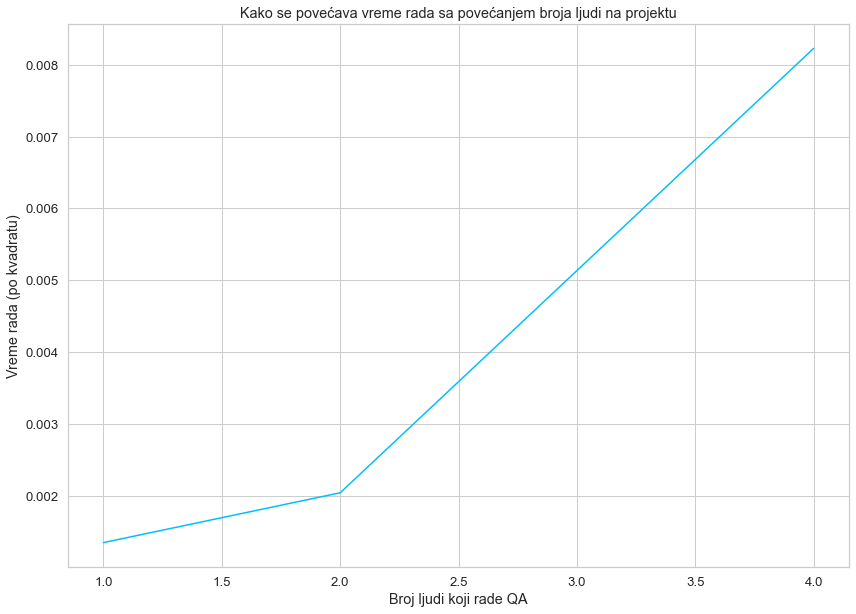

In [317]:
plt.plot([1,2,4], [df_QA[df_QA['broj operatera'] == 1].mean()['work_time by project size'],
          df_QA[df_QA['broj operatera'] == 2].mean()['work_time by project size'],
         df_QA[df_QA['broj operatera'] > 2].mean()['work_time by project size']])
plt.xlabel("Broj ljudi koji rade QA")
plt.ylabel("Vreme rada (po kvadratu)")
plt.title('Kako se povećava vreme rada sa povećanjem broja ljudi na projektu')

### Zaključak 
- Kada radi više od dva operatera QA vreme projekta eksponencijalno skače, skrenuti im pažnju i zabraniti da radi više od 3

Text(0, 0.5, 'Broj operatera po projektu')

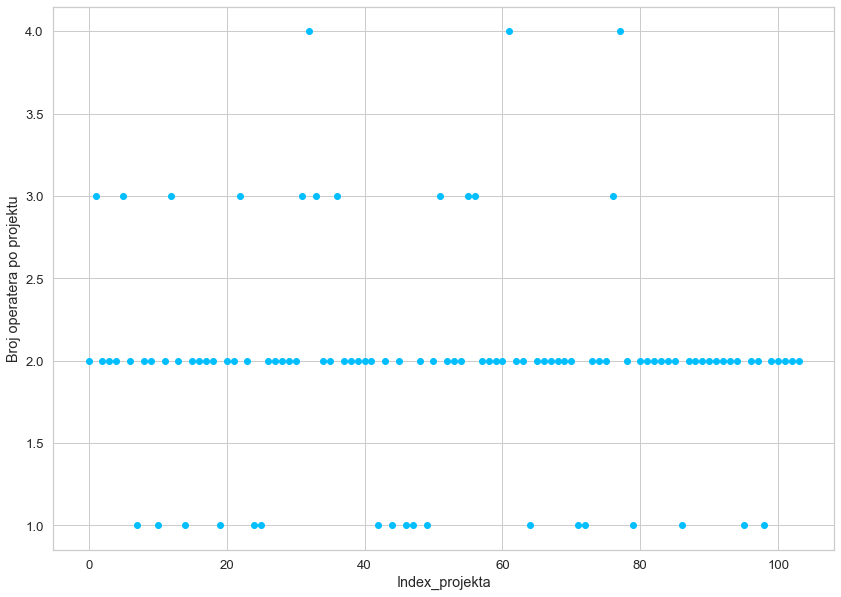

In [314]:
#Scatter plot
plt.scatter(range(len(df_QA['broj operatera'])), df_QA['broj operatera'])
plt.xlabel("Index_projekta")
plt.ylabel("Broj operatera po projektu")
plt.title('Scatter plot na kom se vidi kolk')

In [264]:
print('Od {} projekata, {} projekta imaju više od 3 različita operatera za QA.\nKako smo videli da vreme projekta raste proporcijonalno sa brojem operatera na njemu,\nsavetujemo da se kontaktiraju ljudi sa sledećih projekata:'
      .format(len(df_QA), len(df_QA[df_QA['broj operatera']>3])))
print('project_ID:')
print(df_QA[df_QA['broj operatera']>3]['project id'][0:])

Od 104 projekata, 3 projekta imaju više od 3 različita operatera za QA.
Kako smo videli da vreme projekta raste proporcijonalno sa brojem operatera na njemu,
savetujemo da se kontaktiraju ljudi sa sledećih projekata:
project_ID:
32    IFACNNQMQ1
61    aL0ST7jF64
77    ibAALs4Kib
Name: project id, dtype: object


## 4.3. Analiza None-defined taskova

![alt text](Slike/sql_8_.PNG)
<i><center>SQL code</center> </i>

In [443]:
df_Und = pd.read_csv('Data/3.Undefined.csv')
df_Und.sort_values('broj_put_undefined', ascending = False, inplace=True)
df_Und.head()

,tasks__operator,Task_Name,work_time,broj_put_undefined
12,4LgicHJGyD,Undefined Task,0.012689,4
0,FcyNpCCzIV,Undefined Task,0.000161,2
4,cCWb8BDoGc,Undefined Task,0.001359,2
6,m9rfctjNGR,Undefined Task,0.002193,2
7,mwMA8zHnCv,Undefined Task,0.002623,2


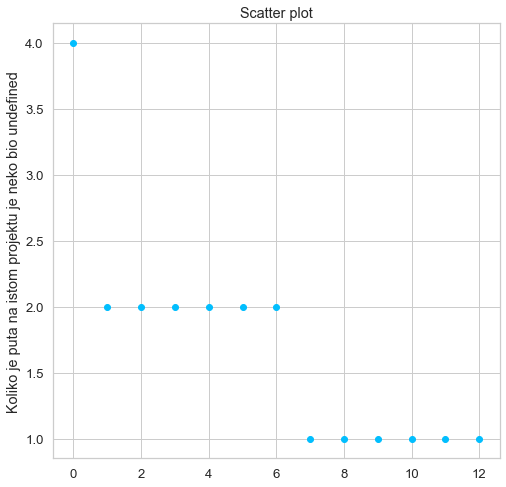

Skrenuti pažnju operatru koji je najviše puta radio undefined: 12    4LgicHJGyD
Name: tasks__operator, dtype: object 


In [451]:
#Scatter plot
fig, ax = plt.subplots(figsize =(8,8))
plt.scatter(range(len(df_Und)), df_Und['broj_put_undefined'])
plt.ylabel("Koliko je puta na istom projektu je neko bio undefined")
plt.title('Scatter plot')
plt.show()
print('Skrenuti pažnju operatru koji je najviše puta radio undefined: {} '.format(df_Und[df_Und['broj_put_undefined']>3]['tasks__operator']))

### 4.3.1. Hipoteza: Projekti sa ljudima koje su najviše bili Undefined duže traju
![alt text](Slike/sql_9.PNG)
<i><center>SQL code</center> </i>

In [502]:
df_H1 = pd.read_csv('Data/4.H1.csv')
df_H1.head() # isto se koristi work_time po jedinici prostora

,id1,work_time_by_livablespace
0,BS4BzvMClR,0.010922
1,Piv2BAVBjb,0.007409
2,bvdd8e6v4G,0.011058
3,df3blK7xCK,0.027926
4,ibAALs4Kib,0.032630


In [505]:
#testirati 
#Srednje vreme rada projekata gde su operateri sa najviše Undefiend taskova
#Srednje vreme rada projekata generalno
razlika = df_H1['work_time_by_livablespace'].mean() - df_proj['Vreme_rada_po_velicini_projekta'].mean()
print('Projekti sa Photo Capture Outlierima traju {:.2f}% duže nego prosečni projekti'.format(df_proj['Vreme_rada_po_velicini_projekta'].mean()/df_H1['work_time_by_livablespace'].mean()*100))
if razlika > 0:
    print('HIPOTEZA SE PRIHVATA')
else:
    print('HIPOTEZA SE NE MOŽE PRIHVATITI')

Projekti sa Photo Capture Outlierima traju 66.21% duže nego prosečni projekti
HIPOTEZA SE PRIHVATA


# ZAKLJUČAK
- Projektri na kojima rade ljudi sa najviše undefined taskova imaju **66.21% DUŽE** proskečno vreme rada !!

# 5. Analiza Alata 

## 5.1. Photo capture tool
![alt text](Slike/sql_10.PNG)
<i><center>SQL code</center> </i>

In [464]:
df_photo = pd.read_csv('Data/5.PhotCapture.csv')
df_photo.head() # isto se koristi work_time po jedinici prostora

,project id,tasks__operator,Task_Name,photoCaptures,work_time,work_time_by_photocaptures,broj operatera
0,8NuEtWLaH9,loO0gOUSOP,Photo Capture,16,240,15.0,1
1,HOmh8xguwZ,sjPT3lh2KD,Photo Capture,10,240,24.0,1
2,Rq1GYMOulj,1u0r08ObeW,Photo Capture,15,480,32.0,1
3,i4ElfNu4I4,1u0r08ObeW,Photo Capture,15,480,32.0,1
4,lonfQAhonh,6cSASzlvvZ,Photo Capture,15,540,36.0,1


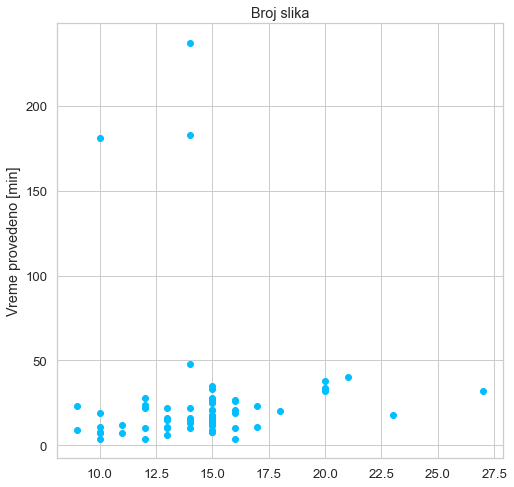

Iz plota iznad jasno može da se vidi abnormalnost 3 tačke i kako su predugo radili na alatu


In [473]:
#Scatter plot
fig, ax = plt.subplots(figsize =(8,8))
plt.scatter(df_photo['photoCaptures'], df_photo['work_time']/60)
plt.ylabel("Vreme provedeno [min]")
plt.title('Broj slika')
plt.show()
print('Iz plota iznad jasno može da se vidi abnormalnost 3 tačke i kako su predugo radili na alatu')

In [486]:
df_photo.sort_values('work_time_by_photocaptures', ascending = False, inplace=True)
df_photo['tasks__operator'][:3]
lista = [i for i in df_photo['tasks__operator'][:3]]
print('Skrenuti pažnju sledćim operatorima:', lista)
lista_projekata_na_kojima_su_radili = [i for i in df_photo['project id'][:3]]

Skrenuti pažnju sledćim operatorima: ['mm8nYzp800', 'P9o6tGp12k', 'miNAe91tcO']


In [506]:
print('Projekti sa outliers (PhotoCapture)', lista_projekata_na_kojima_su_radili)
#srednja efikasnost projekata - srednja efikasnost projekta gde rade outliers
counter = 0
sum_ = 0
for proj in lista_projekata_na_kojima_su_radili:
    Trajanje_projekta = df_proj[(df_proj['_id'] == proj) ]['Vreme_rada_po_velicini_projekta']
    sum_ += np.array(Trajanje_projekta)
    counter += 1
avg = sum_/counter
razlika = avg - df_proj['Vreme_rada_po_velicini_projekta'].mean()
print('Projekti sa Photo Capture Outlierima traju{}% duže nego prosečni projekti'.format(df_proj['Vreme_rada_po_velicini_projekta'].mean()/avg*100))
print('Razlika srednjih vrednosti duzine trajanja:', razlika)
if razlika > 0:
    print('HIPOTEZA SE PRIHVATA')
else:
    print('HIPOTEZA SE NE MOŽE PRIHVATITI')


Projekti sa outliers (PhotoCapture) ['3axCOOrlSE', 'kL2NhZZs10', 'ibAALs4Kib']
Projekti sa Photo Capture Outlierima traju[32.31047247]% duže nego prosečni projekti
Razlika srednjih vrednosti duzine trajanja: [0.0223182]
HIPOTEZA SE PRIHVATA


## ZAKLJUČAK:
- Projekti na kojima se zloupotrebljava alat PHOTO CAPURE traju **32% DUŽE** nego ostali projekti !!

# Rezime

-  Saznali smo u  kom intervalu ih isporucujemo projekte (Sekcija 2)
-  Saznali smo ko su nam najproduktivniji,ispratili brzinu i kvantifikovali kvalitet njihovog rada (Sekcija 3.2.)
-  Detaljno analizarali pojedinačne taskove i saznali da kada radi više ljudi na istom tasku drastično raste vreme proejkta (Sekcija 4.)
-  Saznali da ljudi koji rade sa Undifened taskom često, projekti na kojima rade traju drastično duže, 65% (Sekcija 4.3.1.)
-  Saznali kako se koriste alati i saznali da ljudi koji ih zloupotrebljavaju projekti se oduže (u slučaju alat PHOTO CAPURE ) i traju 32% DUŽE nego ostali projekti (Sekcija 5.)